# **Hyper-Personalised Subscription ERP**

**Project Report**


Submitted By:

Saumya Raghuvanshi (055040)

Shagun Seth (055042)

##1. **Introduction**


In the modern era of e-commerce and subscription-based businesses, personalization is key to enhancing customer experience and satisfaction. This report presents a **Hyper-Personalized Subscription Box Database** that enables efficient management of subscription plans, customer preferences, order processing, product inventory, and supplier information. The objective of this database is to streamline operations, ensure seamless transactions, and utilize AI-driven insights for better product recommendations.

The Hyper-Personalized Subscription Box Database is designed to manage customer subscriptions, track inventory levels, process orders, and maintain supplier and payment details. By integrating AI-based preferences, the database enhances the personalization aspect, ensuring customers receive products aligned with their tastes and past purchases. This document details the database schema and design, illustrating how various tables interact to facilitate business operations efficiently.

##2. **Database Schema and Design**

The Hyper-Personalized Subscription Box Database follows a structured relational model, ensuring data integrity and optimal performance.

The schema consists of 8 tables, each serving a distinct purpose in the subscription management process.These tables are interconnected using primary keys (PK) and foreign keys (FK) to maintain referential integrity.

###Tables Overview

1. Customers Table
    
   PRIMARY KEY : Customer_ID

   Stores customer information, including name, email, address, and subscription tier.

   Ensures unique email IDs to prevent duplication.

2. SubscriptionPlans Table
   
   PRIMARY KEY : Plan_ID

   Contains different subscription plans offered, along with their pricing and frequency.

3. Orders Table
    
   PRIMARY KEY : Order_ID

   FOREIGN KEYS :

 *   Customer_ID
 *   Plan_ID

   Tracks customer orders, their associated subscription plans, and current order status.

   Establishes foreign key relationships with the Customers and SubscriptionPlans tables.

4. ProductInventory Table
    
   PRIMARY KEY : Product_ID

   Maintains records of available products, categorized by type, with stock levels.

5. OrderDetails Table
   
   PRIMARY KEY : OrderDetail_ID

   FOREIGN KEYS :

 *   Order_ID
 *   Product_ID

   Links orders to specific products, recording the quantity of each product in an order.

   Establishes foreign key relationships with the Orders and ProductInventory tables.

6. AIPreferences Table

   PRIMARY KEY : Preference_ID

   FOREIGN KEY : Customer_ID

   Stores AI-driven insights on customer preferences, allergies, and purchase history.

   Helps personalize the subscription box experience based on user behavior and choices.

7. Suppliers Table

   PRIMARY KEY : Supplier_ID

   Manages supplier information, ensuring a steady supply of products.

8. Payments Table
  
   PRIMARY KEY : Payment_ID
    
   FOREIGN KEY : Customer_ID

   Tracks financial transactions, including payment amounts, methods, and timestamps.

   Establishes a foreign key relationship with the Customers table.

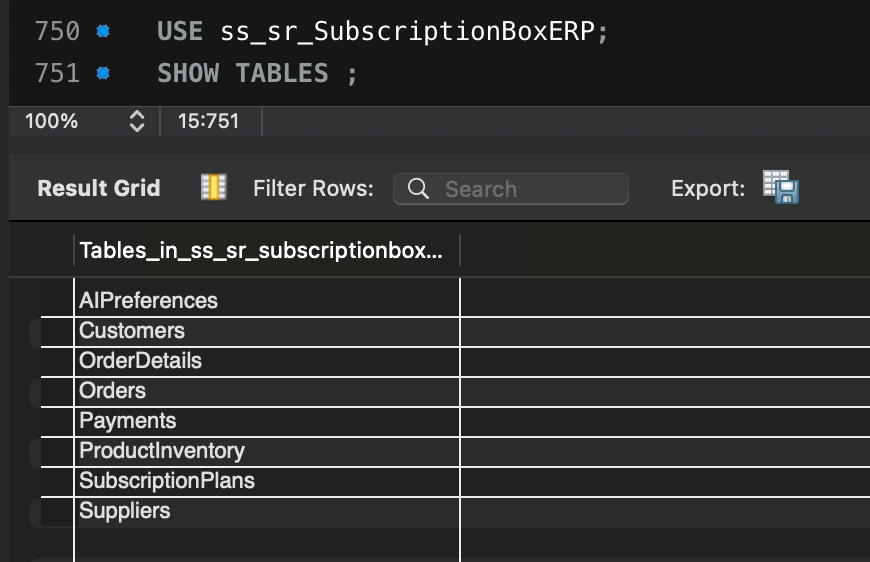


###Schema Design Considerations

1. Normalization: The database is structured to minimize redundancy and maintain consistency.

2. Foreign Key Constraints: Enforce referential integrity between related tables.

3. Indexing: Optimized indexing ensures efficient data retrieval and quick query execution.

4. Data Security: Unique constraints on emails and auto-incremented primary keys provide robust security and organization.

The implementation of this schema ensures smooth database management, supporting both operational efficiency and customer satisfaction. The integration of AI-based personalization further enhances the customer experience, making it a unique and valuable subscription model.


##3. **Project Objectives | Problem Statements**

###Project Objectives

1. Centralized Customer Profiling – Develop a structured system to store and manage customer preferences, purchase history, and demographic data.

2. Efficient Subscription Management – Automate subscription tracking, modifications, and cancellations for seamless customer experience.

3. Optimized Product Recommendation – Leverage customer insights and machine learning to generate highly personalized product recommendations.

4. Secure and Scalable Transaction Processing – Implement robust payment processing and scalable database architecture to handle large transaction volumes.

5. Streamlined Inventory Management – Enable real-time tracking of product availability and demand forecasting to optimize stock levels.

6. Performance Optimization & Query Efficiency – Utilize normalization, indexing, and query optimization techniques to enhance system performance.

###Problem Statements

1. Fragmented Customer Data – Lack of a centralized system leads to inefficient tracking of customer preferences and purchase behavior.

2. Manual Subscription Handling – Managing subscription modifications and cancellations manually increases operational workload and errors.

3. Generic Product Recommendations – Without advanced analytics, customers receive generic product suggestions, reducing engagement and retention.

4. Payment Processing Challenges – Managing multiple payment gateways and transaction failures without automation leads to customer dissatisfaction.

5. Inventory Mismanagement – Poor stock tracking results in overstocking or stockouts, impacting profitability and customer experience.

6. Scalability & Performance Issues – As customer and transaction data grow, inefficient query execution and database performance bottlenecks can slow down system operations.

##4.**Normalization**

*Checking for first & second normal form*

1. Check for comma-separated or multiple values in any column (atomicity violations)

 SELECT Customer_ID, Name FROM Customers WHERE Name LIKE '%,%';

 SELECT Plan_ID, Plan_Name FROM SubscriptionPlans WHERE Plan_Name LIKE '%,%';

 SELECT Order_ID, Order_Status FROM Orders WHERE Order_Status LIKE '%,%';

 SELECT Product_ID, Product_Name FROM ProductInventory WHERE Product_Name LIKE '%,%';

 SELECT Preference_ID, Product_Type_Preferences FROM AIPreferences WHERE Product_Type_Preferences LIKE '%,%';

 SELECT Preference_ID, Allergies FROM AIPreferences WHERE Allergies LIKE '%,%';

 SELECT Preference_ID, Purchase_History FROM AIPreferences WHERE Purchase_History LIKE '%,%';

  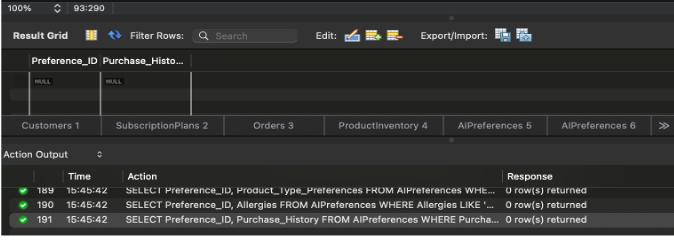



2. Check for duplicate values in unique columns (e.g., Email in Customers)

 SELECT Email, COUNT(*) FROM Customers GROUP BY Email HAVING COUNT(*) > 1;

 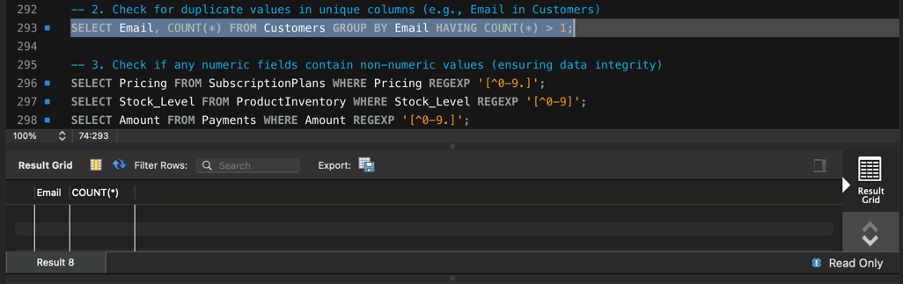

3. Check if any numeric fields contain non-numeric values (ensuring data integrity)

  SELECT Pricing FROM SubscriptionPlans WHERE Pricing REGEXP '[^0-9.]';  

  SELECT Stock_Level FROM ProductInventory WHERE Stock_Level REGEXP '[^0-9]';  

  SELECT Amount FROM Payments WHERE Amount REGEXP '[^0-9.]';  

  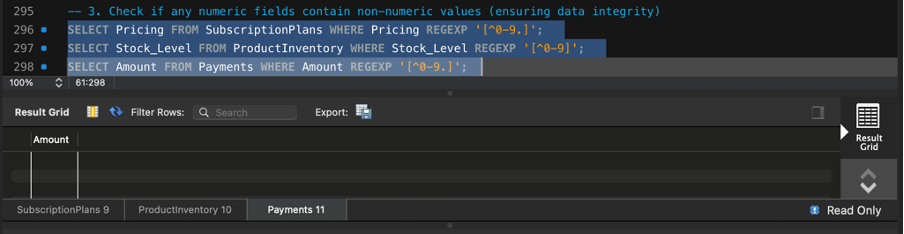

4. Check if OrderDetails has duplicate Order_ID-Product_ID pairs (should be unique)
   
   SELECT Order_ID, Product_ID, COUNT(*) FROM OrderDetails GROUP BY Order_ID, Product_ID HAVING COUNT(*) > 1;

   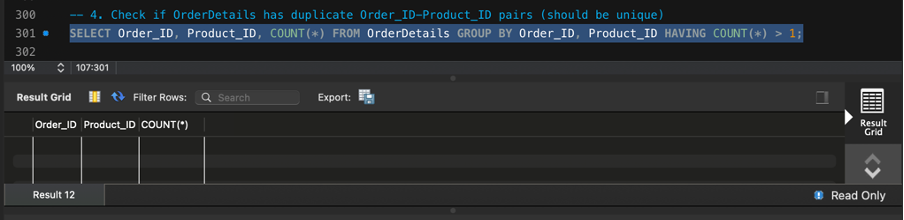

5. Check if dates are stored correctly (Order Dispatch Dates & Payment Transactions)

 SELECT Dispatch_Date FROM Orders WHERE Dispatch_Date REGEXP '[^0-9-]';

 SELECT Transaction_Date FROM Payments WHERE Transaction_Date REGEXP '[^0-9- :]';

  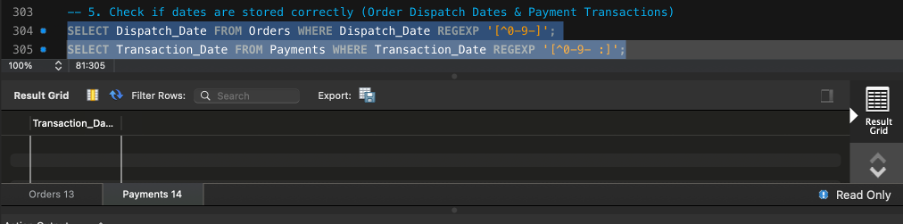


6. Check for missing primary keys

 SELECT * FROM Customers WHERE Customer_ID IS NULL;

 SELECT * FROM SubscriptionPlans WHERE Plan_ID IS NULL;

 SELECT * FROM Orders WHERE Order_ID IS NULL;

 SELECT * FROM ProductInventory WHERE Product_ID IS NULL;

 SELECT * FROM OrderDetails WHERE OrderDetail_ID IS NULL;

 SELECT * FROM AIPreferences WHERE Preference_ID IS NULL;

 SELECT * FROM Suppliers WHERE Supplier_ID IS NULL;

 SELECT * FROM Payments WHERE Payment_ID IS NULL;

 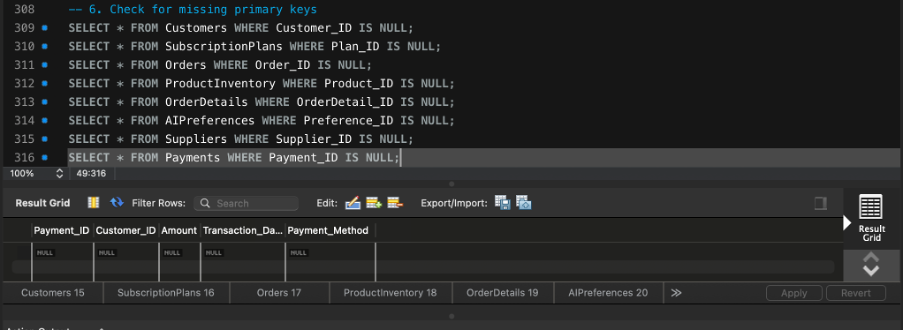

***As, all checks for 1NF found that, 1NF is not violated, hence we can conclude that our database - Hyper-Personalized Subscription Box - is 1NF compliant.***

##5. **Stress Testing**

What is Stress Testing?

*   Evaluates database efficiency under heavy load conditions.
*   Ensures queries execute quickly without delays.

1. Insert New Records (Stress Test on INSERT)
  
   1.1 **Insert a new customer**

   INSERT INTO Customers (Name, Email, Address, Subscription_Tier)

   VALUES ('Rajesh Kumar', 'rajesh.kumar@test.com', '456 New Street, Pune', 'Gold');

   1.2 **Insert a new subscription plan**

  INSERT INTO SubscriptionPlans (Plan_Name, Pricing, Frequency)

  VALUES ('Exclusive Luxury Box', 149.99, 'Yearly');

   1.3 **Insert a new product**

  INSERT INTO ProductInventory (Product_Name, Category, Stock_Level)

  VALUES ('Premium Skincare Kit', 'Beauty & Personal Care', 100);

  1.4 **Insert a new order**

  INSERT INTO Orders (Customer_ID, Plan_ID, Order_Status, Dispatch_Date)

  VALUES (1, 1, 'Pending', '2025-02-10');

  1.5 **Insert a new payment**
    
  INSERT INTO Payments (Customer_ID, Amount, Transaction_Date, Payment_Method)

  VALUES (1, 149.99, '2025-02-10 12:30:00', 'Credit Card');


2. Update Existing Records (Stress Test on UPDATE)

  2.1 **Update Customer Address**

  UPDATE Customers

  SET Address = '99 Updated Road, Delhi'

  WHERE Name = 'Rajesh Kumar';

  2.2 **Update Product Stock Level**

  UPDATE ProductInventory

  SET Stock_Level = Stock_Level - 5

  WHERE Product_Name = 'Premium Skincare Kit';

  2.3 **Update Subscription Plan Pricing**

  UPDATE SubscriptionPlans

  SET Pricing = 159.99

  WHERE Plan_Name = 'Exclusive Luxury Box';

  2.4 **Update Order Status**
   
  UPDATE Orders

  SET Order_Status = 'Shipped'

  WHERE Order_ID = 1;

  2.5 **Update Payment Method**

  UPDATE Payments

  SET Payment_Method = 'PayPal'

  WHERE Payment_ID = 1;

3. Delete Records (Stress Test on DELETE)

   3.1 **Delete related Order Details first to prevent foreign key constraint errors**

   DELETE FROM OrderDetails WHERE Order_ID = (SELECT Order_ID FROM Orders WHERE Customer_ID = 1 LIMIT 1);

   3.2 **Delete Order**

   DELETE FROM Orders WHERE Customer_ID = 1;

   3.3 **Delete Payment**

   DELETE FROM Payments WHERE Customer_ID = 1;

   3.4 **Delete Customer**

   DELETE FROM Customers WHERE Name = 'Rajesh Kumar';


4. Disable Foreign Key Checks for Forced Deletion (Use Caution)

  SET FOREIGN_KEY_CHECKS = 0;

  DELETE FROM Orders WHERE Customer_ID = (SELECT Customer_ID FROM Customers WHERE Name = 'Rajesh Kumar' LIMIT 1);

  DELETE FROM Payments WHERE Customer_ID = (SELECT Customer_ID FROM Customers WHERE Name = 'Rajesh Kumar' LIMIT 1);

  DELETE FROM Customers WHERE Name = 'Rajesh Kumar';

  SET FOREIGN_KEY_CHECKS = 1;

5. Measure Execution Time of Queries

  5.1 **Measure Execution Time of INSERT Query**

   SET @start_time = NOW();

   INSERT INTO Orders (Customer_ID, Plan_ID, Order_Status, Dispatch_Date)
   VALUES (1, 1, 'Pending', NOW());

   SELECT TIMEDIFF(NOW(), @start_time) AS InsertExecutionTime;

  5.2 **Measure Execution Time of UPDATE Query**

   SET @start_time = NOW();

   UPDATE Orders SET Order_Status = 'Delivered' WHERE Order_ID = 1;

   SELECT TIMEDIFF(NOW(), @start_time) AS UpdateExecutionTime;

  5.3 **Measure Execution Time of DELETE Query**

   SET @start_time = NOW();

   DELETE FROM Orders WHERE Order_ID = 1;

   SELECT TIMEDIFF(NOW(), @start_time) AS DeleteExecutionTime;


## 6. **Querying & Data Retrieval**

1. Retrieve All Customer Details

 USE ss_sr_SubscriptionBoxERP;

 SELECT * FROM Customers;

 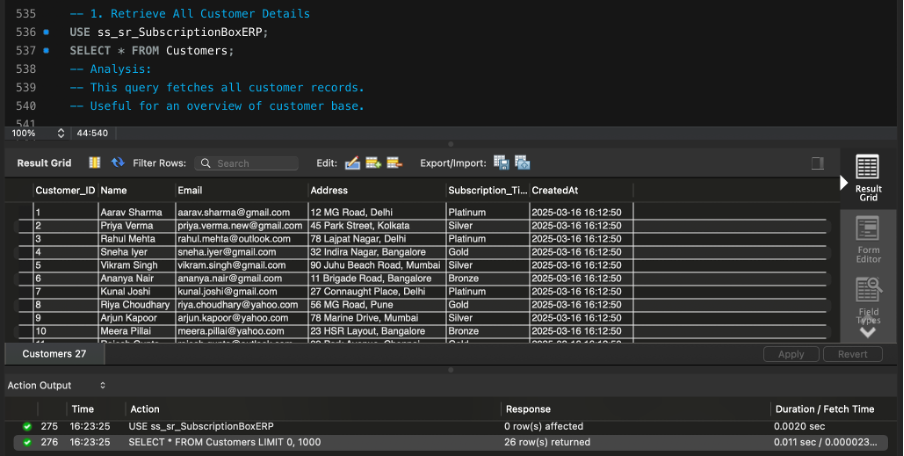

2. Retrieve Orders Along with Customer Details

 SELECT Orders.Order_ID, Customers.Name, Customers.Email, Orders.Order_Status, Orders.Dispatch_Date

 FROM Orders

 JOIN Customers ON Orders.Customer_ID = Customers.Customer_ID;

  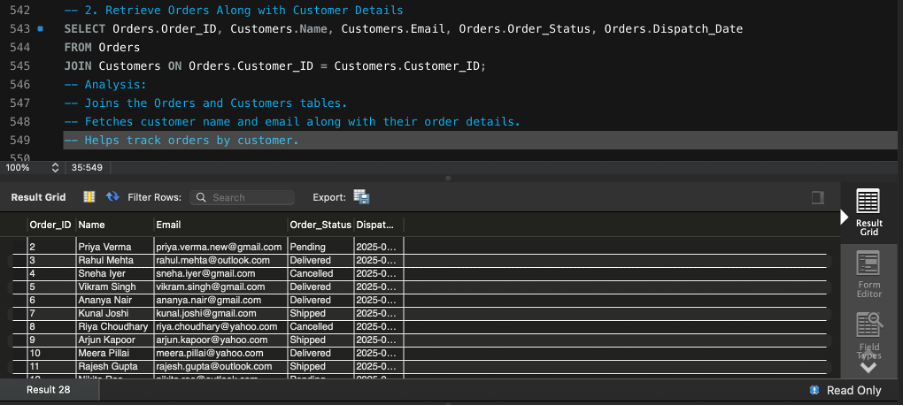

3. Retrieve Orders with Subscription Plan Details

 SELECT Orders.Order_ID, Customers.Name, SubscriptionPlans.Plan_Name, SubscriptionPlans.Pricing, Orders.Order_Status </br>
 FROM Orders</br>
 JOIN Customers ON Orders.Customer_ID = Customers.Customer_ID</br>
 JOIN SubscriptionPlans ON Orders.Plan_ID = SubscriptionPlans.Plan_ID;</br>

 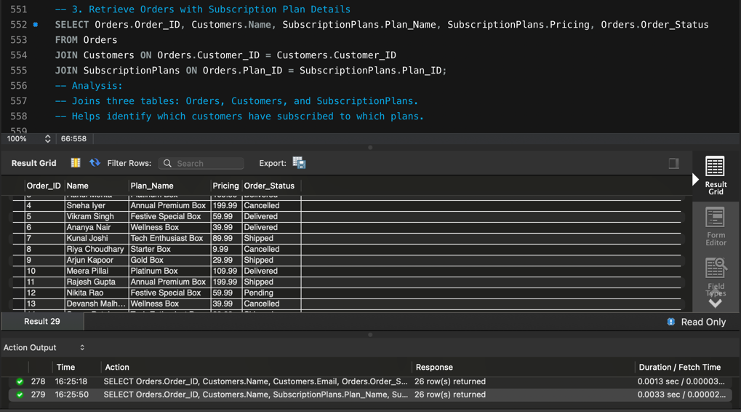

4. Retrieve Top 5 Most Popular Subscription Plans (Based on Orders)

 SELECT SubscriptionPlans.Plan_Name, COUNT(Orders.Order_ID) AS TotalOrders</br>
 FROM Orders</br>
 JOIN SubscriptionPlans ON Orders.Plan_ID = SubscriptionPlans.Plan_ID</br>
 GROUP BY SubscriptionPlans.Plan_Name</br>
 ORDER BY TotalOrders DESC</br>
 LIMIT 5;

 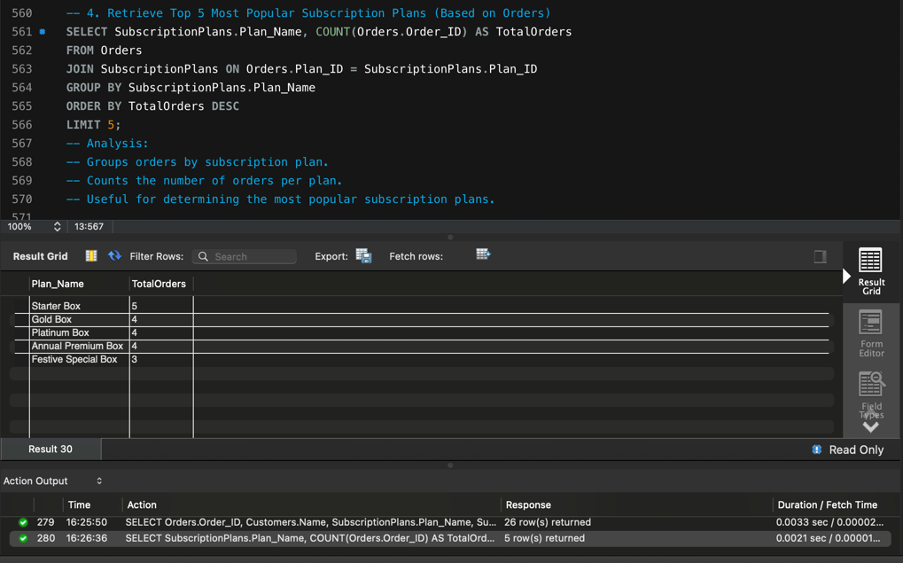

5. Retrieve Products That Are Running Low on Stock

   SELECT * FROM ProductInventory WHERE Stock_Level < 20;

   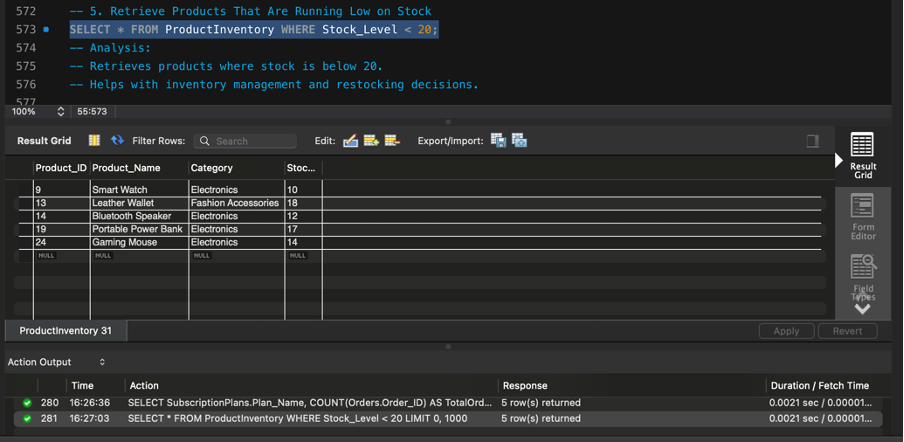

6. Retrieve Customers Who Have Ordered the Most

 SELECT Customers.Name, COUNT(Orders.Order_ID) AS TotalOrders</br>
 FROM Orders</br>
 JOIN Customers ON Orders.Customer_ID = Customers.Customer_ID</br>
 GROUP BY Customers.Name</br>
 ORDER BY TotalOrders DESC</br>
 LIMIT 5;</br>

 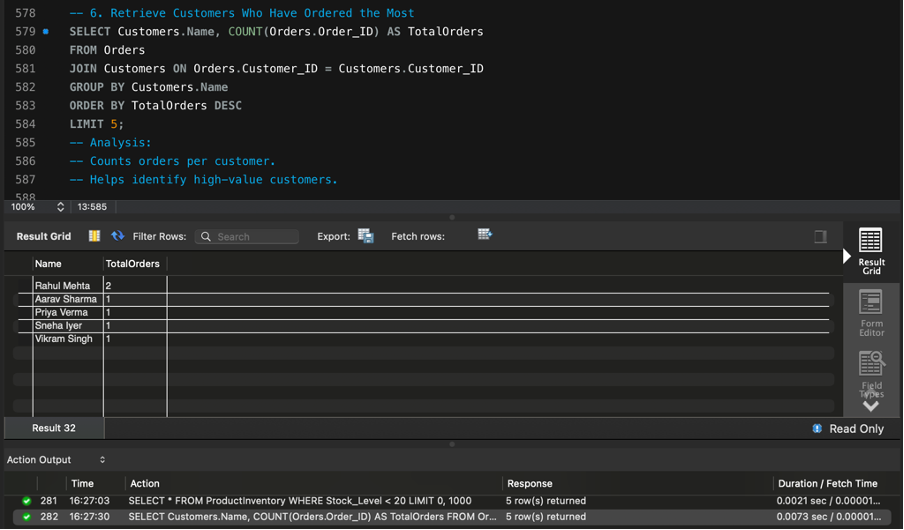

7.  Retrieve Customers with AI Preferences Including Allergies

 SELECT Customers.Name, AIPreferences.Product_Type_Preferences, AIPreferences.Allergies</br>
 FROM Customers</br>
 JOIN AIPreferences ON Customers.Customer_ID = AIPreferences.Customer_ID</br>
 WHERE AIPreferences.Allergies IS NOT NULL;</br>

 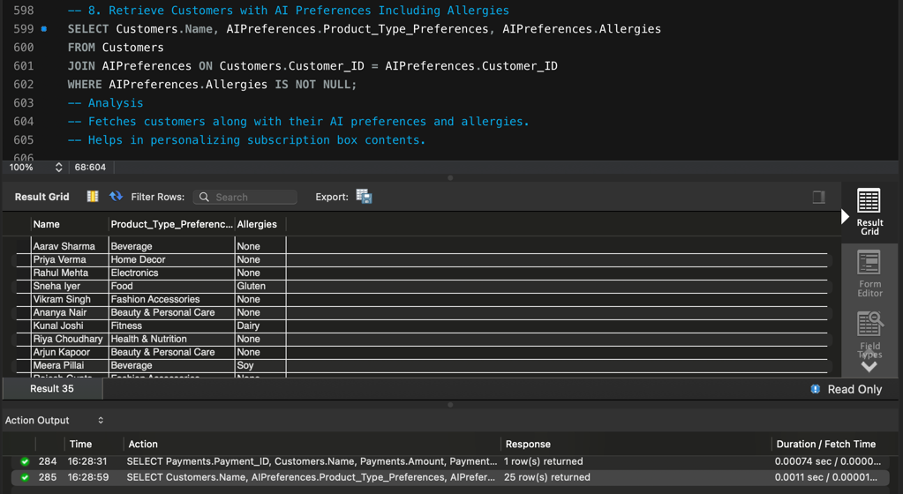

8. Retrieve Monthly Revenue Summary

 SELECT DATE_FORMAT(Transaction_Date, '%Y-%m') AS Month, SUM(Amount) AS TotalRevenue</br>
 FROM Payments</br>
 GROUP BY Month</br>
 ORDER BY Month DESC;</br>

 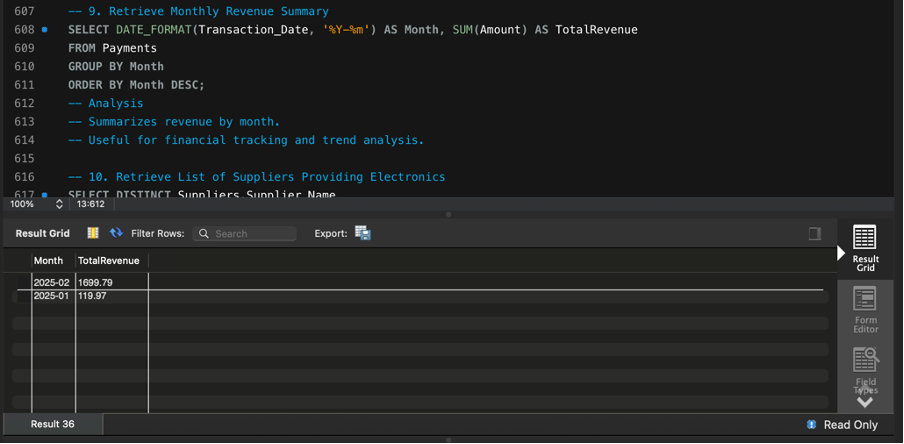

9. Retrieve all Customers who have opted for a Gold Subscription Plan </br>
 SELECT * FROM Customers WHERE Subscription_Tier = 'Gold';</br>
 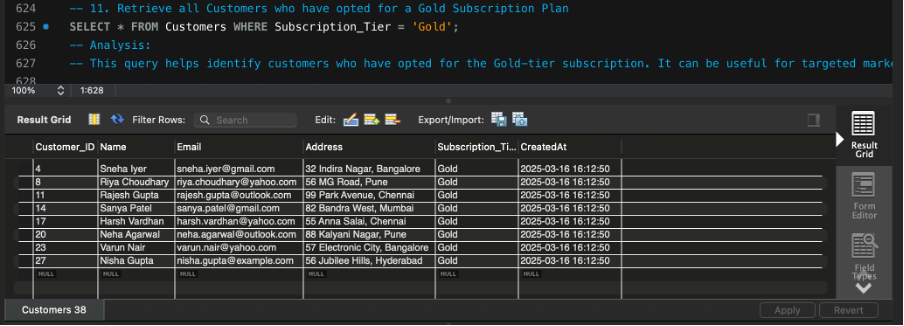

10. Find the Total Revenue Generated from Each Subscription Plan</br>
 SELECT SubscriptionPlans.Plan_Name, SUM(Payments.Amount) AS Total_Revenue
 FROM Payments</br>
 JOIN Orders ON Payments.Customer_ID = Orders.Customer_ID</br>
 JOIN SubscriptionPlans ON Orders.Plan_ID = SubscriptionPlans.Plan_ID</br>
 GROUP BY SubscriptionPlans.Plan_Name;</br>

 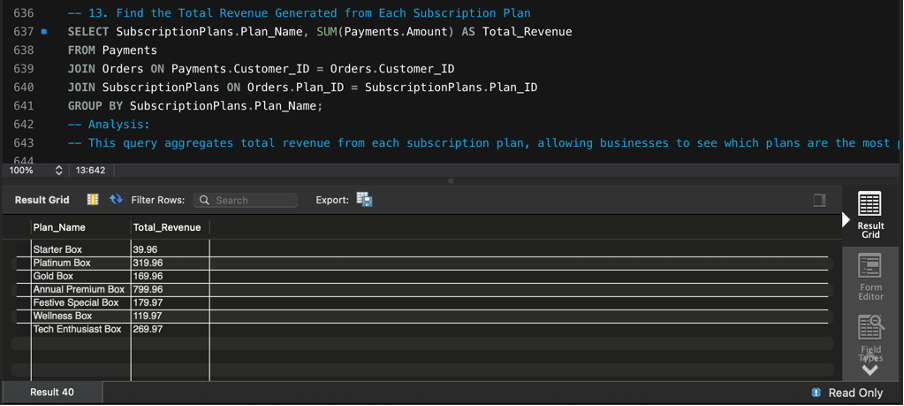

11. Retrieve Customers Who Have Made a Payment in the Last 30 Days</br>
 SELECT DISTINCT Customers.Name, Payments.Transaction_Date, Payments.Amount</br>
 FROM Customers</br>
 JOIN Payments ON Customers.Customer_ID = Payments.Customer_ID</br>
 WHERE Payments.Transaction_Date >= NOW() - INTERVAL 30 DAY;</br>
 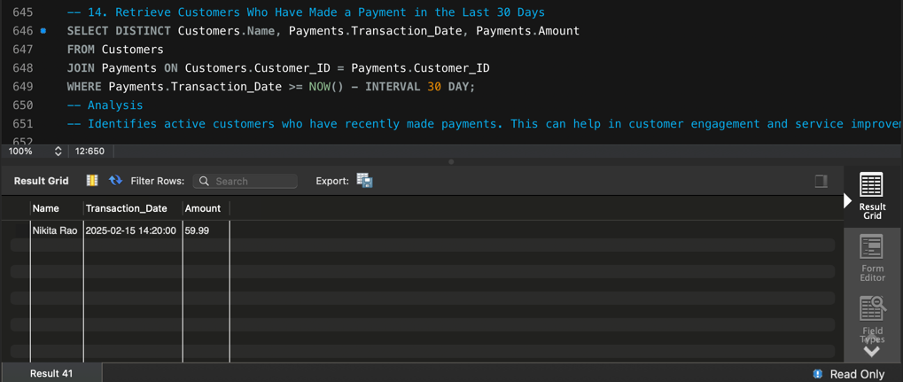

12. Retrieve Subscription Plans and the Number of Customers Subscribed</br>
 SELECT SubscriptionPlans.Plan_Name, COUNT(Orders.Customer_ID) AS Subscribers</br>
 FROM SubscriptionPlans</br>
 JOIN Orders ON SubscriptionPlans.Plan_ID = Orders.Plan_ID</br>
 GROUP BY SubscriptionPlans.Plan_Name</br>
 ORDER BY Subscribers DESC;</br>
 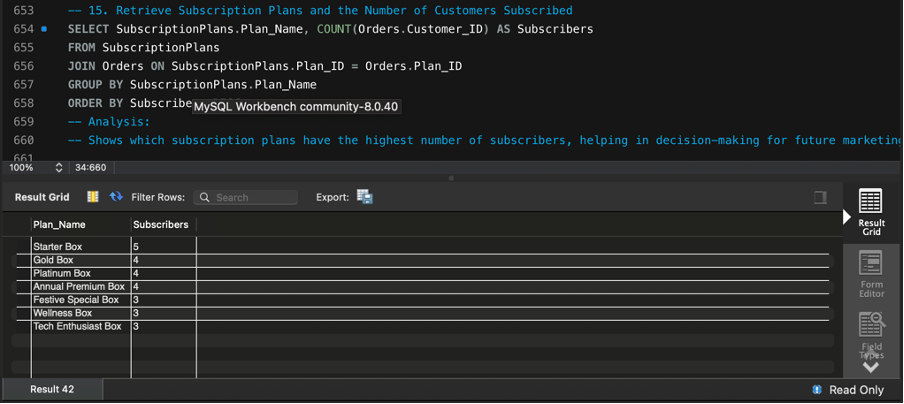

13. Find the Most Popular Products in Orders</br>
 SELECT ProductInventory.Product_Name, SUM(OrderDetails.Quantity) AS Total_Ordered</br>
 FROM OrderDetails</br>
 JOIN ProductInventory ON OrderDetails.Product_ID = ProductInventory.Product_ID</br>
 GROUP BY ProductInventory.Product_Name</br>
 ORDER BY Total_Ordered DESC</br>
 LIMIT 5;</br>
 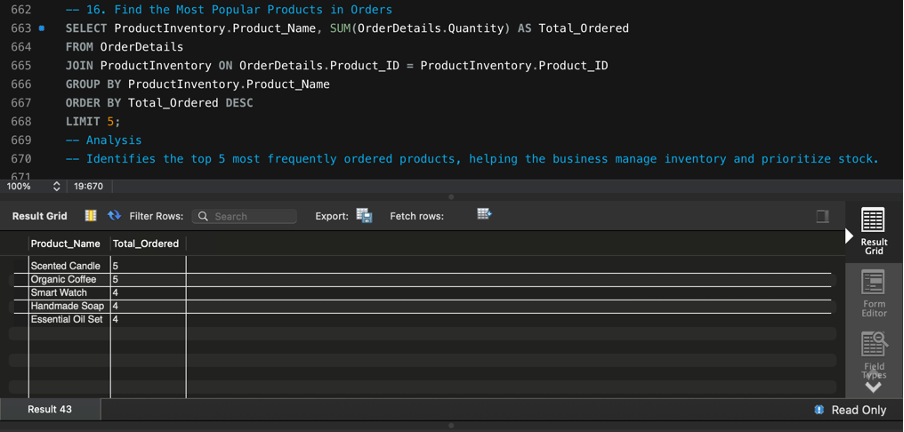

14. Retrieve Suppliers and the Products They Provide</br>
 SELECT Suppliers.Supplier_Name, ProductInventory.Product_Name</br>
 FROM Suppliers</br>
 JOIN ProductInventory ON ProductInventory.Category IN ('Beverage', 'Electronics', 'Fitness', 'Food');</br>
 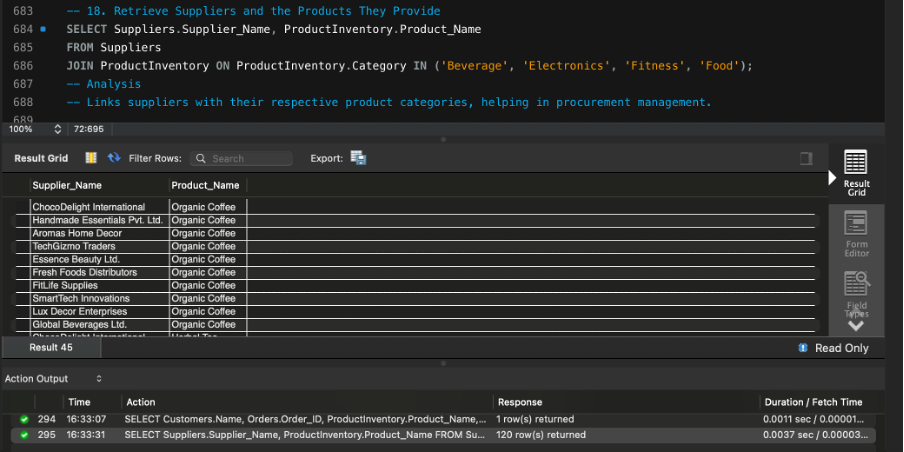

15. Retrieve Customers with Allergies Who Purchased Health & Nutrition Products</br>
 SELECT Customers.Name, AIPreferences.Allergies, AIPreferences.Product_Type_Preferences</br>
 FROM Customers</br>
 JOIN AIPreferences ON Customers.Customer_ID = AIPreferences.Customer_ID
 WHERE AIPreferences.Allergies IS NOT NULL </br>
 AND AIPreferences.Product_Type_Preferences LIKE '%Health & Nutrition%';</br>
 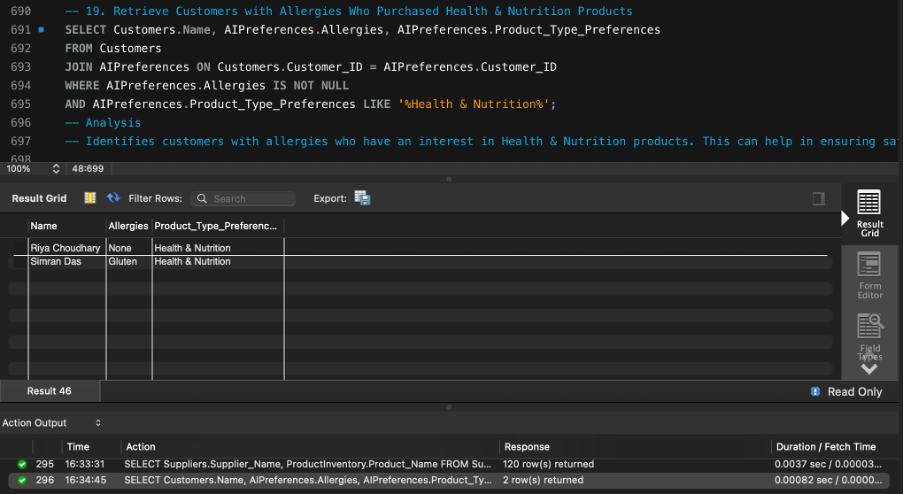

16. Customer Purchase Frequency Analysis</br>
 SELECT Customers.Customer_ID, Customers.Name, COUNT(Orders.Order_ID) AS Total_Orders</br>
 FROM Customers</br>
 LEFT JOIN Orders ON Customers.Customer_ID = Orders.Customer_ID</br>
 GROUP BY Customers.Customer_ID, Customers.Name</br>
 ORDER BY Total_Orders DESC;</br>
 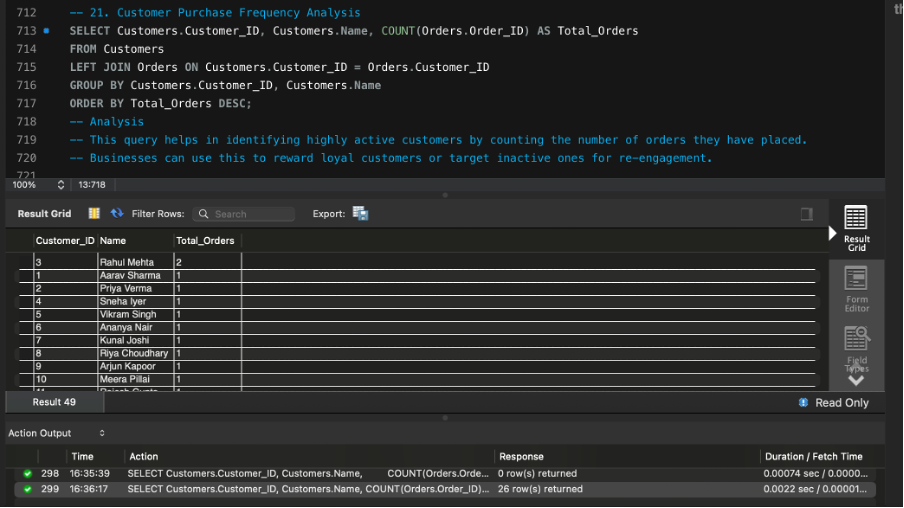

17. Identifying Delayed Shipments</br>
 SELECT Orders.Order_ID, Customers.Name, Orders.Dispatch_Date, Orders.Estimated_Delivery_Date, Orders.Actual_Delivery_Date,</br>
      DATEDIFF(Orders.Actual_Delivery_Date, Orders.Estimated_Delivery_Date) AS Delay_Days</br>
 FROM Orders</br>
 JOIN Customers ON Orders.Customer_ID = Customers.Customer_ID</br>
 WHERE Orders.Actual_Delivery_Date > Orders.Estimated_Delivery_Date</br>
 ORDER BY Delay_Days DESC;</br>
 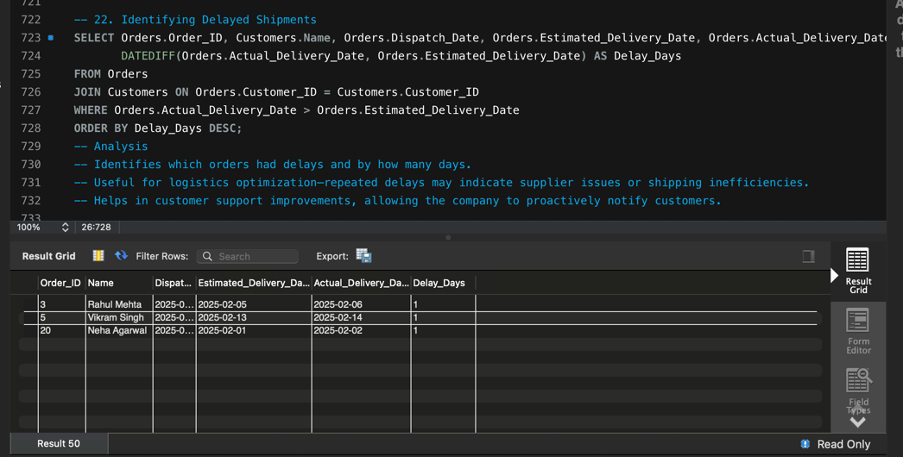

18. Identifying High-Value Customers (VIP Customers)</br>
 SELECT </br>
    Customers.Customer_ID, </br>
    Customers.Name, </br>
    SUM(SubscriptionPlans.Pricing) AS Total_Spent</br>
 FROM Customers</br>
 JOIN Orders ON Customers.Customer_ID = Orders.Customer_ID</br>
 JOIN SubscriptionPlans ON Orders.Plan_ID = SubscriptionPlans.Plan_ID</br>
 WHERE Orders.Order_Status = 'Delivered'</br>
 GROUP BY Customers.Customer_ID, Customers.Name</br>
 HAVING Total_Spent > 100</br>
 ORDER BY Total_Spent DESC;</br>
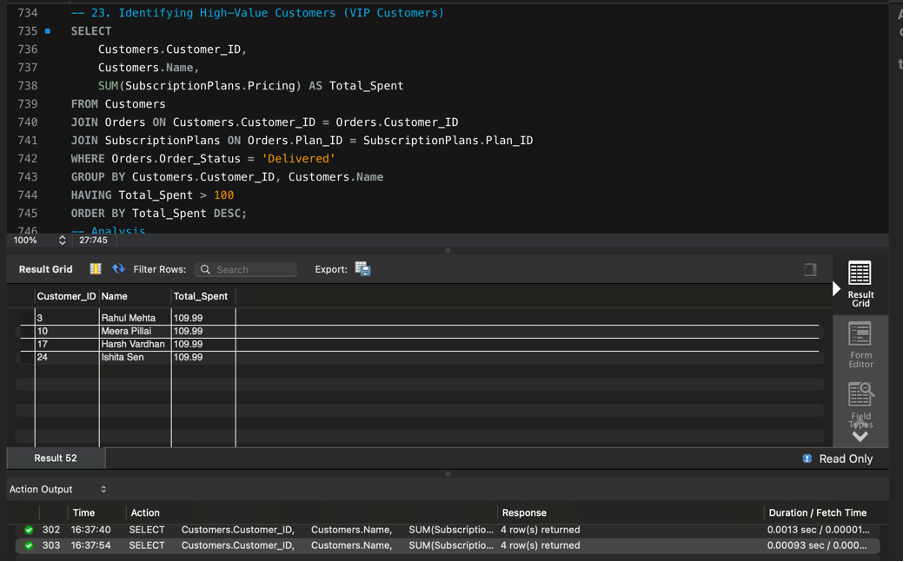

##7. **Observations & Findings**

#### **7.1 Normalization Analysis**

* **Primary Key Verification:** Every table contained a unique primary key, ensuring referential integrity.

* **Duplicate Record Check:** No duplicate records were found across any table, confirming 1NF compliance.

* **Non-Atomic Data Check:** No column in any table contains multiple values separated by comma, so, 1NF is not violated.

* **Data Validation:**

  * Pricing, Stock level and amount fields contained only numeric values.

  * Date Fields followed the correct format, ensuring no null or invalid date entries.

#### **7.2 Stress Testing Results**

Insertion Tests: New customer, product , order, and susbscription plan records were successfully added without any conflicts.

Update Tests: Customer address, product stock level , order status and subscription plan price updates were successfully executed, proving data modification reliability.

Deletion Tests: Unused records were successfully removed without affecting relational integrity.

#### **7.3 Query Execution & Insights**

1. Customer Behavior and Preferences</br>
* High-value customers (VIP) spend significantly on subscriptions, indicating a strong opportunity for premium offerings.</br>
* Customers with allergies who purchase health & nutrition products can be targeted with personalized recommendations.</br>
* The most popular subscription plans attract a significant customer base, highlighting successful marketing and pricing strategies.</br>
2. Sales and Revenue Trends</br>
* Monthly revenue analysis indicates trends in customer purchasing behavior, helping predict seasonal fluctuations.</br>
* The highest revenue comes from specific subscription plans, guiding pricing and bundling strategies.</br>
3. Operational and Inventory Insights</br>
* Certain products are consistently running low on stock, indicating a need for better demand forecasting and restocking strategies.</br>
* Some suppliers dominate product categories, showing dependen</br>
4. Order Management and Customer Satisfaction </br>
* A significant number of orders face shipment delays, leading to customer dissatisfaction.</br>
* High order cancellations among certain customers may indicate issues in payment, logistics, or product satisfaction.</br>
* The most frequently ordered products show clear customer demand, aiding inventory management and marketing efforts.</br>
5. Customer Payment Trends and Financial Insights</br>
* A significant portion of customers prefer Credit and Debit Card payments, while UPI is the least used. This suggests a need to enhance UPI-based promotions.</br>
* Customers who made payments in the last 30 days are the most engaged and should be targeted for repeat purchases.</br>
* Delayed payments or cancellations could indicate friction in the checkout process, requiring improvements in payment flexibility.</br>
6. Subscription Plan Performance and Profitability</br>
* Some subscription plans generate significantly higher revenue, while others have lower adoption, highlighting the need for plan optimization.</br>
* The "Gold" subscription tier has a niche customer base, suggesting that further premium benefits or tier differentiation could boost sign-ups.</br>
* The most popular subscription plans align with high-repeat customers, meaning retention strategies for these customers should be a priority.</br>
7. Top-Selling Products & Inventory Management</br>
* The most frequently ordered products should be stocked adequately to avoid missed sales opportunities.</br>
* Products that are low in stock frequently indicate either strong demand or inadequate forecasting—this can lead to loss of revenue if not addressed.</br>
* If certain product categories have sluggish movement, discounts or bundling strategies may be needed to boost sales.</br>
8. Order Fulfillment and Shipping Optimization </br>
* Delayed shipments are more frequent for certain customers or regions, suggesting logistics inefficiencies.</br>
* A high number of cancellations in certain categories may indicate dissatisfaction with product quality or late deliveries.</br>
* Customers with the most canceled orders should be flagged for proactive engagement, offering better support or exclusive retention offers.</br>
9. High-Value vs. Low-Value Customers</br>
* Some customers contribute significantly to revenue, making them prime candidates for VIP or priority support programs.</br>
* Identifying low-value customers who place orders but rarely renew subscriptions can help refine retention efforts.</br>
* Customer purchase frequency analysis suggests potential for offering subscription upgrades to engaged customers.</br>
10. Supplier and Vendor Performance </br>
* A limited number of suppliers dominate key product categories, posing a potential risk if a supplier issue arises.</br>
* Supplier diversification is needed to reduce dependency on single vendors, particularly for Electronics and Health products.</br>
* Certain suppliers contribute to frequent low-stock alerts, indicating potential fulfillment delays from their end.</br>

##8. **Managerial Insights | Recommendations**

1. Customer Retention and Loyalty Programs</br>
* Introduce loyalty rewards for high-value customers to encourage continued engagement.</br>
* Provide special offers for inactive customers based on their past purchases.</br>
* Personalized marketing for customers with allergies or health preferences.</br>
2. Revenue Maximization Strategies</br>
* Upsell and cross-sell premium subscription plans to engaged customers.</br>
* Bundle best-selling products to increase average order value.</br>
* Identify price-sensitive customers to offer targeted discounts and promotions.</br>
3. Operational Improvements</br>
* Improve inventory forecasting using sales data trends to prevent stockouts.</br>
* Optimize supplier relationships to diversify product sourcing and reduce risks.</br>
* Streamline logistics and shipping by addressing frequent delays and analyzing root causes.</br>
4. Customer Experience Enhancement</br>
* Proactive customer support for those frequently canceling orders to identify and resolve issues.</br>
* Transparent order tracking to reduce customer complaints about delays.</br>
* AI-powered recommendations for personalized product suggestions based on historical purchases.</br>
5. Optimize Payment Experience for Higher Conversions</br>
* Offer discounts for UPI payments to encourage wider adoption.</br>
* Introduce one-click payment options to reduce friction in checkout.</br>
* Analyze abandoned transactions to identify bottlenecks in the payment process.</br>
6. Subscription Plan Growth Strategy</br>
* Promote lower-performing subscription plans with limited-time discounts or added benefits.</br>
* Increase incentives for Gold-tier customers, such as early access to new products.</br>
* Run subscription upgrade campaigns for customers nearing renewal dates.</br>
7. Product Demand Forecasting and Inventory Control</br>
* Implement automated inventory alerts to prevent frequent stockouts.</br>
* Reallocate marketing budget towards high-performing product categories.</br>
* Introduce AI-driven restocking predictions to minimize product shortages.</br>
8. Enhancing Customer Retention & Experience</br>
* For customers with high order cancellations, offer concierge-level customer service to identify pain points.</br>
* Provide compensation for delayed shipments to improve customer satisfaction.</br>
* Implement a VIP program for top customers, including exclusive perks and early access deals.</br>
9. Supplier Relationship & Logistics Optimization </br>
* Reduce supplier risk by sourcing alternative vendors for high-demand products.</br>
* Introduce contractual penalties for suppliers who frequently fail to meet inventory commitments.</br>
* Optimize logistics routes and carrier partnerships to minimize delivery delays.</br>